In [70]:
import os
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import pycaret
pycaret.__version__

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, Isomap
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_pickle("data/df_filtered.pickle")
normed_df = pd.DataFrame(
    StandardScaler().fit_transform(df), columns=df.columns, index=df.index
)

In [9]:
df_raw = pd.read_pickle("data/accepted_df_raw.pickle")

Methods to condsider:
- PCA
- Kernel PCA
- Locally Linear Embedding (LLE)
- t-SNE 
- K-Means
- Hierarchical Clustering
- DBSCAN
- Gaussain Mixture Models
- Kernel Density Estimation (KDE)
- One-Class SVM

# Dimensionality Reduction

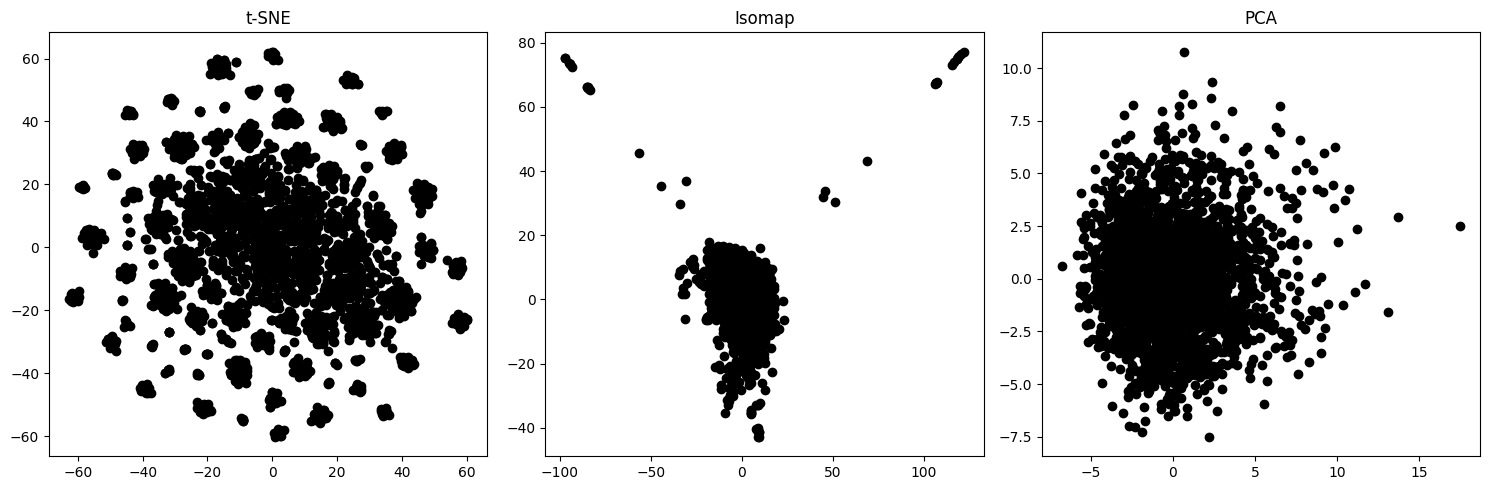

In [15]:
# Original code to obtain transformed data
df_sample = normed_df.sample(2500, random_state=2023)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
isomap = Isomap(n_components=2, n_neighbors=10)
pca = PCA(n_components=2)

df_tsne = tsne.fit_transform(df_sample)
df_isomap = isomap.fit_transform(df_sample)
df_pca = pca.fit_transform(df_sample)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axs[0].scatter(df_tsne[:, 0], df_tsne[:, 1], color="black")
axs[0].set_title("t-SNE")

axs[1].scatter(df_isomap[:, 0], df_isomap[:, 1], color="black")
axs[1].set_title("Isomap")

axs[2].scatter(df_pca[:, 0], df_pca[:, 1], color="black")
axs[2].set_title("PCA")

plt.tight_layout()
plt.show()

In [52]:
columns_of_interest = ["grade", "loan_status", "addr_state"]
df_sample = df_sample.join(df_raw[columns_of_interest])

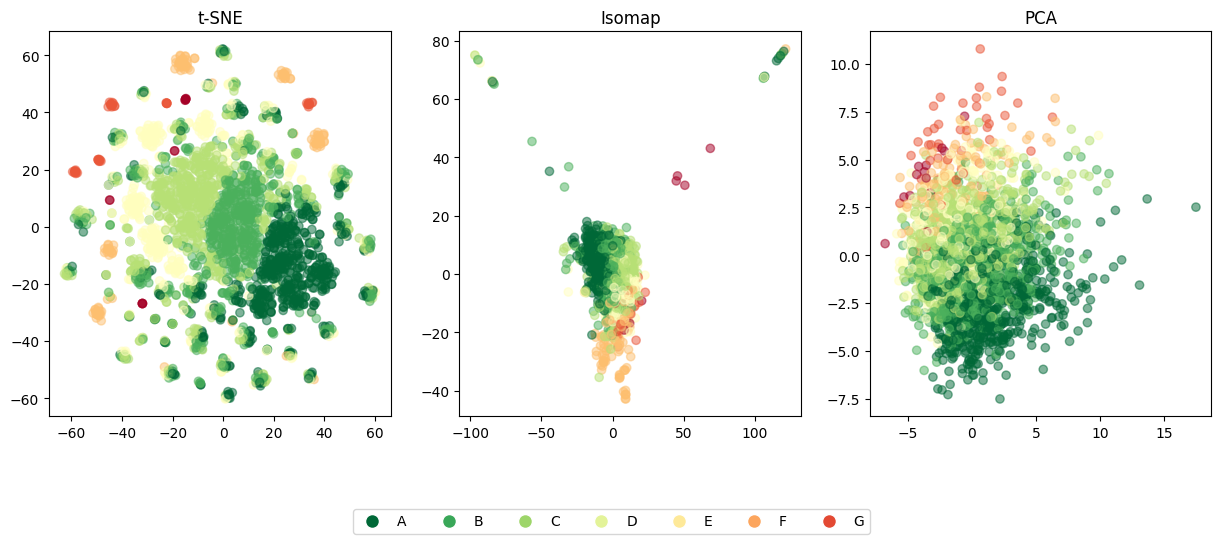

In [95]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# Convert the categorical grades to numerical labels
label_encoder = LabelEncoder()
encoded_grades = label_encoder.fit_transform(df_sample["grade"])
alpha = 0.5

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Reverse the color map
cmap = plt.cm.RdYlGn
reversed_cmap = cmap.reversed()

# Scatter plot for t-SNE
scatter_tsne = axs[0].scatter(
    df_tsne[:, 0], df_tsne[:, 1], c=encoded_grades, cmap=reversed_cmap, alpha=alpha
)
axs[0].set_title("t-SNE")

# Scatter plot for Isomap
scatter_isomap = axs[1].scatter(
    df_isomap[:, 0], df_isomap[:, 1], c=encoded_grades, cmap=reversed_cmap, alpha=alpha
)
axs[1].set_title("Isomap")

# Scatter plot for PCA
scatter_pca = axs[2].scatter(
    df_pca[:, 0], df_pca[:, 1], c=encoded_grades, cmap=reversed_cmap, alpha=alpha
)
axs[2].set_title("PCA")

# Create a legend
legend_labels = label_encoder.classes_
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=reversed_cmap(i / len(legend_labels)), markersize=10) for i, label in
                    enumerate(legend_labels)]
fig.legend(legend_elements, legend_labels, loc='center', bbox_to_anchor=(0.5, -0.1),
           ncol=len(legend_labels))

plt.show()


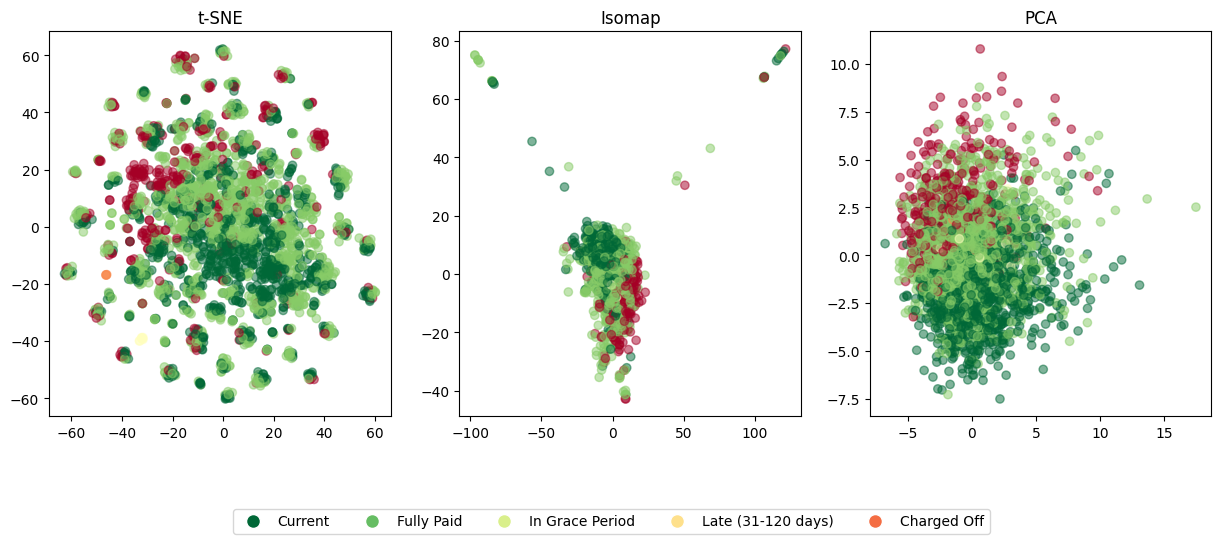

In [117]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Convert the categorical grades to numerical labels
label_encoder = LabelEncoder()
# label_encoder.classes_ = np.append(
#     label_encoder.classes_[1:], label_encoder.classes_[0]
# )
encoded_grades = (label_encoder.fit_transform(df_sample["loan_status"]) - 1) % 5
alpha = 0.5

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Reverse the color map
cmap = plt.cm.RdYlGn
reversed_cmap = cmap.reversed()

# Scatter plot for t-SNE
scatter_tsne = axs[0].scatter(
    df_tsne[:, 0], df_tsne[:, 1], c=encoded_grades, cmap=reversed_cmap, alpha=alpha
)
axs[0].set_title("t-SNE")

# Scatter plot for Isomap
scatter_isomap = axs[1].scatter(
    df_isomap[:, 0], df_isomap[:, 1], c=encoded_grades, cmap=reversed_cmap, alpha=alpha
)
axs[1].set_title("Isomap")

# Scatter plot for PCA
scatter_pca = axs[2].scatter(
    df_pca[:, 0], df_pca[:, 1], c=encoded_grades, cmap=reversed_cmap, alpha=alpha
)
axs[2].set_title("PCA")

# Create a legend
legend_labels = np.append(label_encoder.classes_[1:], label_encoder.classes_[0])
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label=label,
        markerfacecolor=reversed_cmap(i / len(legend_labels)),
        markersize=10,
    )
    for i, label in enumerate(legend_labels)
]
fig.legend(
    legend_elements,
    legend_labels,
    loc="center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=len(legend_labels),
)

plt.show()

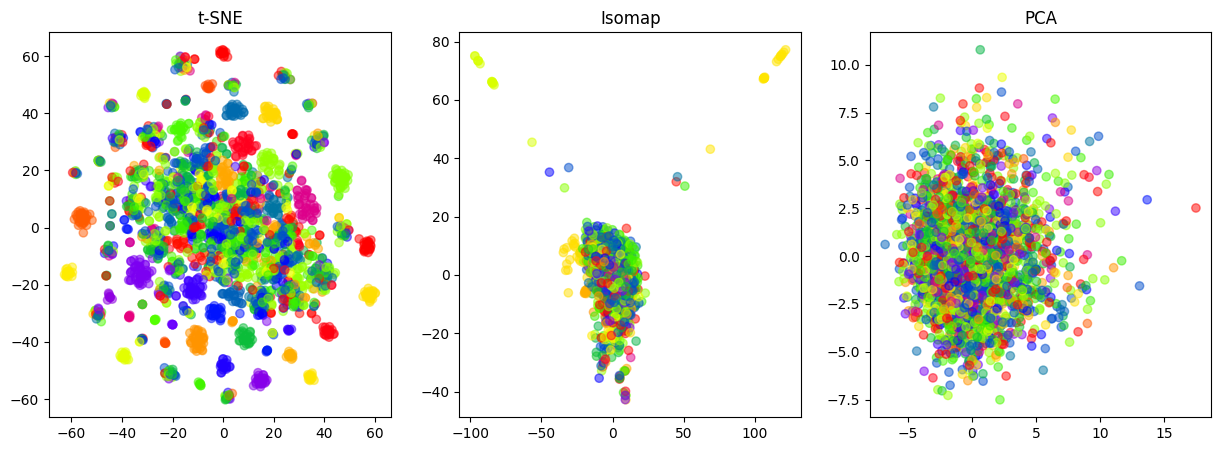

In [121]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Convert the categorical grades to numerical labels
label_encoder = LabelEncoder()
# label_encoder.classes_ = np.append(
#     label_encoder.classes_[1:], label_encoder.classes_[0]
# )
encoded_grades = label_encoder.fit_transform(df_sample["addr_state"])
alpha = 0.5

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Reverse the color map
cmap = plt.cm.prism
reversed_cmap = cmap.reversed()

# Scatter plot for t-SNE
scatter_tsne = axs[0].scatter(
    df_tsne[:, 0], df_tsne[:, 1], c=encoded_grades, cmap=reversed_cmap, alpha=alpha
)
axs[0].set_title("t-SNE")

# Scatter plot for Isomap
scatter_isomap = axs[1].scatter(
    df_isomap[:, 0], df_isomap[:, 1], c=encoded_grades, cmap=reversed_cmap, alpha=alpha
)
axs[1].set_title("Isomap")

# Scatter plot for PCA
scatter_pca = axs[2].scatter(
    df_pca[:, 0], df_pca[:, 1], c=encoded_grades, cmap=reversed_cmap, alpha=alpha
)
axs[2].set_title("PCA")

# Create a legend
legend_labels = label_encoder.classes_
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label=label,
        markerfacecolor=reversed_cmap(i / len(legend_labels)),
        markersize=10,
    )
    for i, label in enumerate(legend_labels)
]
# fig.legend(
#     legend_elements,
#     legend_labels,
#     loc="center",
#     bbox_to_anchor=(0.5, -0.1),
#     ncol=len(legend_labels),
# )

plt.show()

   Explained Variance Ratio
0                  0.739427
1                  0.108732
2                  0.082725
3                  0.048221


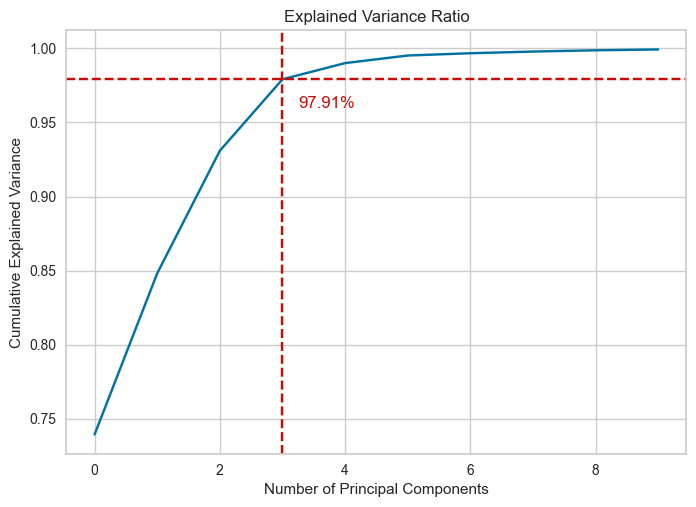

Selected number of components: 4


In [47]:
df = pd.read_pickle("data/df_filtered.pickle").sample(10000, random_state=2023)

# Perform PCA
pca = PCA(n_components=10)
pca.fit(df)

# Obtain the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance Ratio")

# Determine the optimal number of principal components
cumulative_variance = np.cumsum(explained_variance_ratio)
threshold = 0.95  # Set your desired threshold for explained variance

# Find the index where cumulative variance exceeds the threshold
num_components = np.argmax(cumulative_variance > threshold) + 1

# Perform PCA with the optimal number of components
pca = PCA(n_components=num_components)
df_transformed = pca.fit_transform(df)

# Access the principal components
principal_components = pd.DataFrame(
    data=df_transformed, columns=[f"PC{i}" for i in range(num_components)]
)

# Access the explained variance ratio for each component
component_variance_ratio = pd.DataFrame(
    data=explained_variance_ratio[:num_components], columns=["Explained Variance Ratio"]
)

# Print the explained variance ratio for each component
print(component_variance_ratio)
# Plot dotted lines
plt.axvline(x=num_components - 1, color="r", linestyle="--")
plt.axhline(y=cumulative_variance[num_components - 1], color="r", linestyle="--")

# Add label for explained variance
plt.text(
    num_components - 0.75,
    cumulative_variance[num_components] - 0.03,
    f"{cumulative_variance[num_components-1]*100:.2f}%",
    color="r",
)

plt.show()
# Print the selected number of components
print(f"Selected number of components: {num_components}")

In [62]:
pca = PCA(n_components=4)
df_transformed = pca.fit_transform(df)

# Anomaly Detection

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:21:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:21:45
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:21:46
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

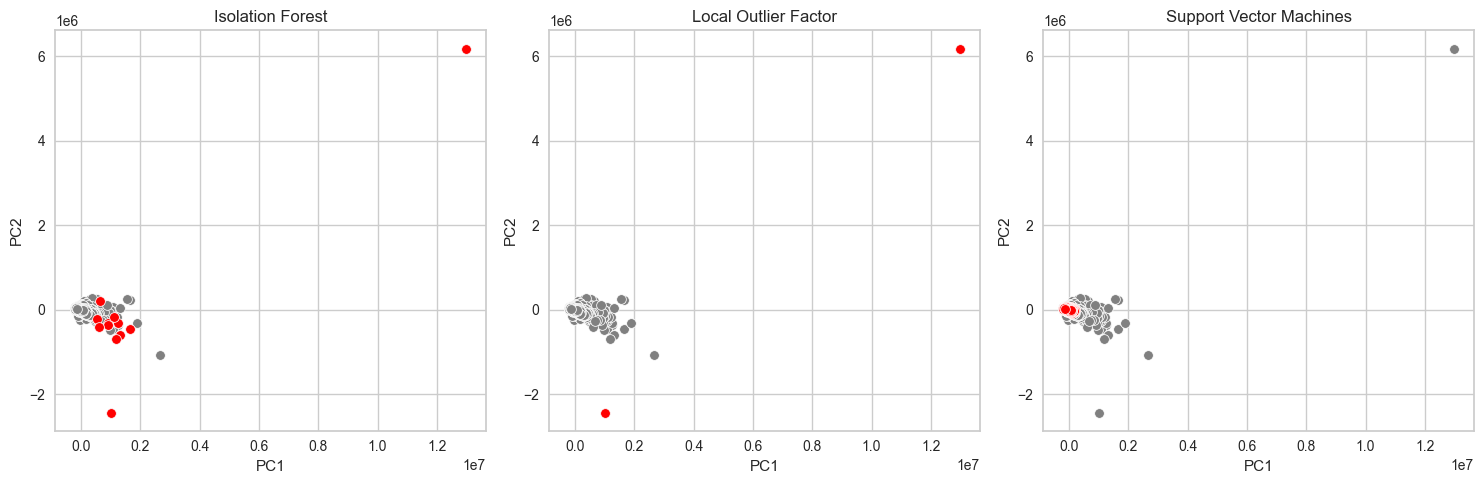

In [117]:
from pycaret.anomaly import *

# Load the dataset (replace 'data_array' with your NumPy array)
data = df_transformed

# Convert the NumPy array to a DataFrame
df = pd.DataFrame(data, columns=[f"PC{i}" for i in range(1, 5)])

# Initialize the PyCaret setup
anomaly_setup = setup(df, normalize=True)

# Create and evaluate the models
iforest = create_model("iforest")
lof = create_model("lof")
svm = create_model("svm")

# Get the decision scores or probabilities
iforest_scores = iforest.decision_scores_
lof_scores = lof.decision_scores_
svm_scores = svm.decision_scores_

# Manually adjust the anomaly detection thresholds
iforest_threshold = 0.2  # Adjust the threshold value as per your requirement
lof_threshold =  10  # Adjust the threshold value as per your requirement
svm_threshold = 0  # Adjust the threshold value as per your requirement

# Generate the predictions based on the adjusted thresholds
iforest_preds = iforest_scores > iforest_threshold
lof_preds = lof_scores > lof_threshold
svm_preds = svm_scores < svm_threshold

# Plotting the anomalies
plt.figure(figsize=(15, 5))

# Plotting Isolation Forest
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="PC1", y="PC2", color="gray")
sns.scatterplot(data=df[iforest_preds], x="PC1", y="PC2", color="red")
plt.title("Isolation Forest")

# Plotting Local Outlier Factor
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="PC1", y="PC2", color="gray")
sns.scatterplot(data=df[lof_preds], x="PC1", y="PC2", color="red")
plt.title("Local Outlier Factor")

# Plotting Support Vector Machines
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="PC1", y="PC2", color="gray")
sns.scatterplot(data=df[svm_preds], x="PC1", y="PC2", color="red")
plt.title("Support Vector Machines")

plt.tight_layout()
plt.show()

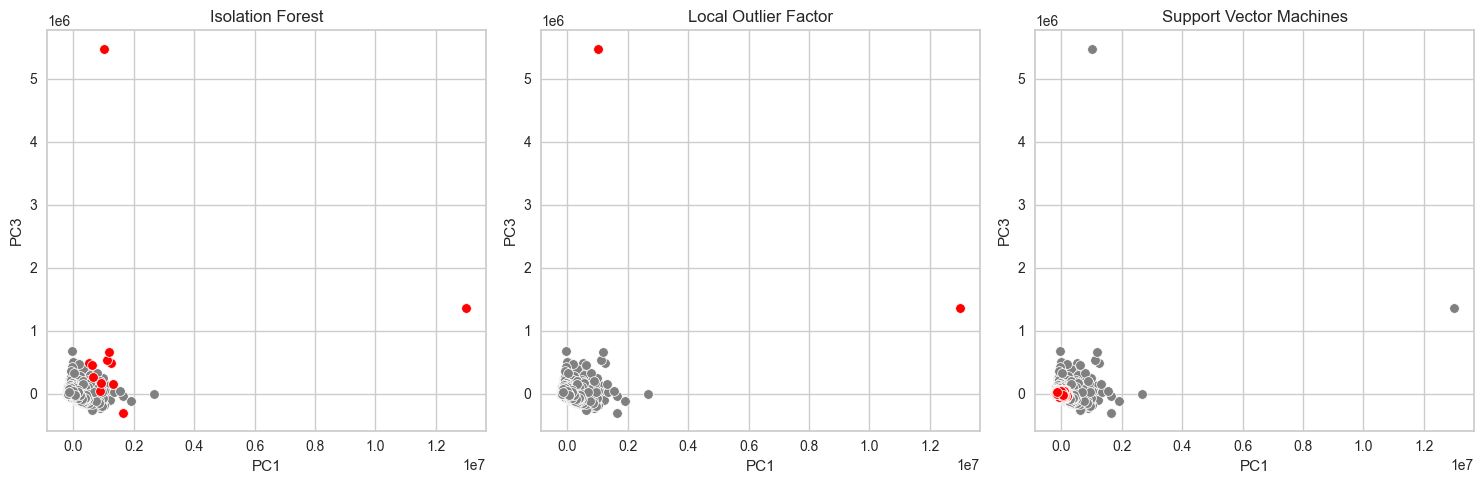

In [118]:
# Plotting the anomalies
plt.figure(figsize=(15, 5))

# Plotting Isolation Forest
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="PC1", y="PC3", color="gray")
sns.scatterplot(data=df[iforest_preds], x="PC1", y="PC3", color="red")
plt.title("Isolation Forest")

# Plotting Local Outlier Factor
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="PC1", y="PC3", color="gray")
sns.scatterplot(data=df[lof_preds], x="PC1", y="PC3", color="red")
plt.title("Local Outlier Factor")

# Plotting Support Vector Machines
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="PC1", y="PC3", color="gray")
sns.scatterplot(data=df[svm_preds], x="PC1", y="PC3", color="red")
plt.title("Support Vector Machines")

plt.tight_layout()
plt.show()

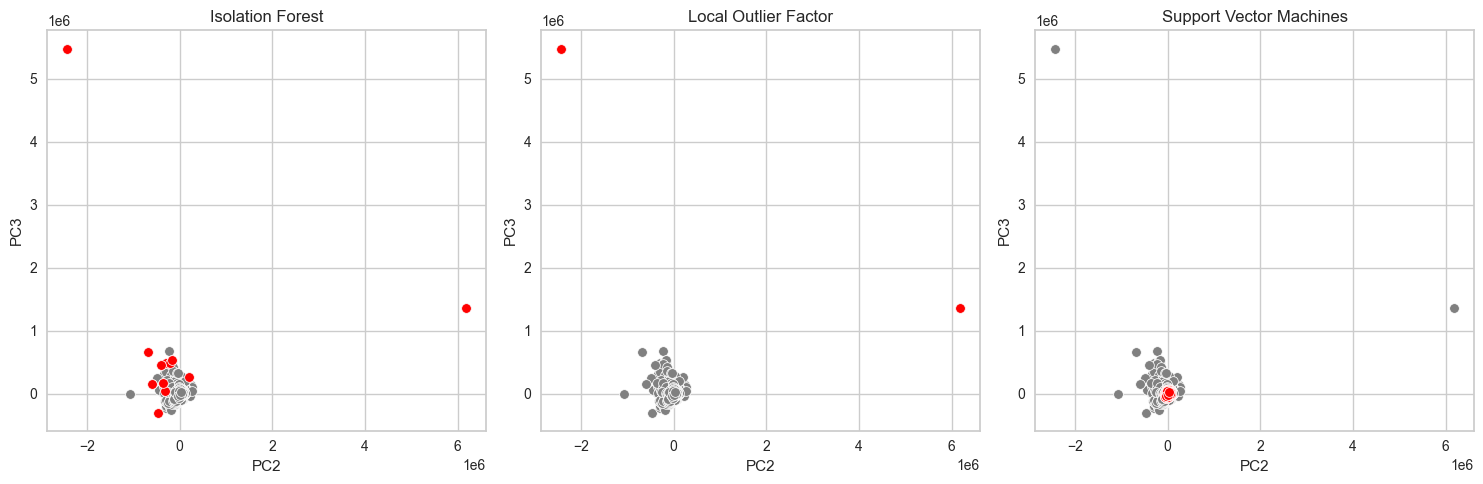

In [119]:
# Plotting the anomalies
plt.figure(figsize=(15, 5))

# Plotting Isolation Forest
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="PC2", y="PC3", color="gray")
sns.scatterplot(data=df[iforest_preds], x="PC2", y="PC3", color="red")
plt.title("Isolation Forest")

# Plotting Local Outlier Factor
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="PC2", y="PC3", color="gray")
sns.scatterplot(data=df[lof_preds], x="PC2", y="PC3", color="red")
plt.title("Local Outlier Factor")

# Plotting Support Vector Machines
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="PC2", y="PC3", color="gray")
sns.scatterplot(data=df[svm_preds], x="PC2", y="PC3", color="red")
plt.title("Support Vector Machines")

plt.tight_layout()
plt.show()

# Clustering

In [120]:
from pycaret.clustering import *

In [124]:
df_transformed = df_transformed[~lof_preds]

## K-Means

In [125]:
# df_sample = df.sample(2500, random_state=2023)
s = setup(df_transformed, session_id=221, normalize=True)

In [126]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [127]:
kmeans = create_model("kmeans")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:25:48
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3552,3502.0047,1.1315,0,0,0


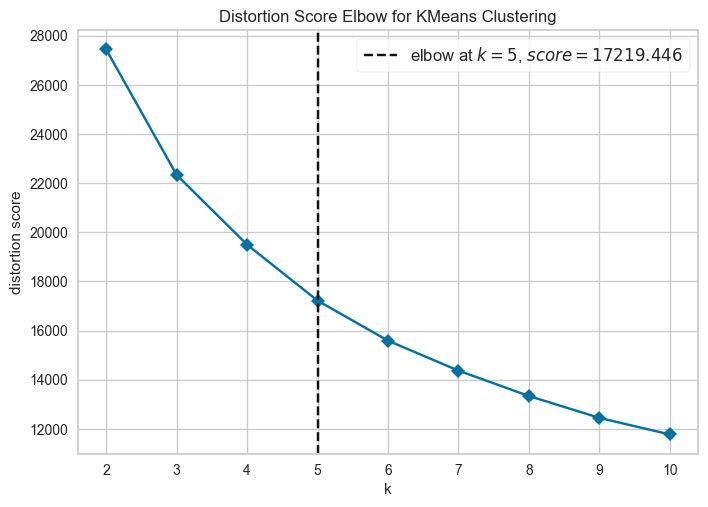

In [128]:
plot_model(kmeans, plot="elbow")

100%|██████████| 9/9 [00:37<00:00,  4.13s/it]


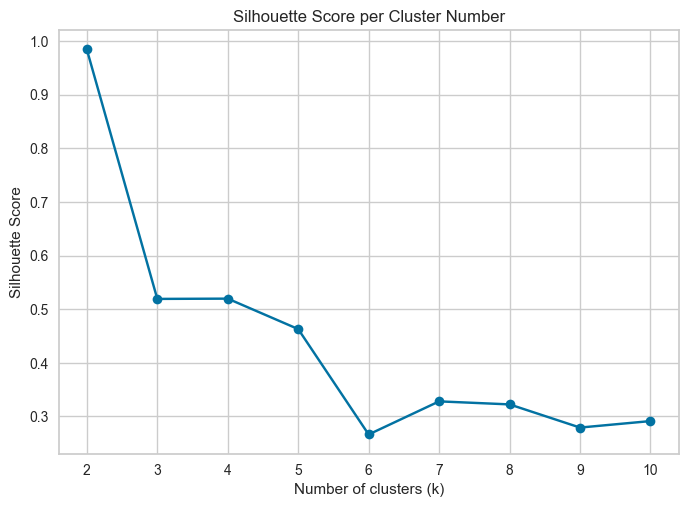

In [53]:
# Define a list of cluster numbers (k) to evaluate
cluster_nums = range(2,11)

# Initialize empty lists to store silhouette scores and plot coordinates
silhouette_scores = []
x_coords = []
y_coords = []

# Iterate over cluster numbers
for k in tqdm(cluster_nums):
    # Create a clustering model with the current k
    kmeans = create_model('kmeans', num_clusters=k, verbose=False)
    
    # Assign clusters to the data points
    assign_clusters = assign_model(kmeans)
    
    # Extract the cluster labels
    labels = assign_clusters['Cluster']
    
    # Calculate the silhouette score
    score = silhouette_score(df_transformed, labels)
    
    # Store the silhouette score for the current k
    silhouette_scores.append(score)
    
    # Store coordinates for plotting
    x_coords.append(k)
    y_coords.append(score)

# Plot the silhouette scores
plt.plot(x_coords, y_coords, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per Cluster Number')
plt.show()

In [130]:
kmeans = create_model("kmeans", num_clusters=4)
plot_model(kmeans, plot="cluster")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:29:49
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3552,3502.0047,1.1315,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Agglomerative Clustering

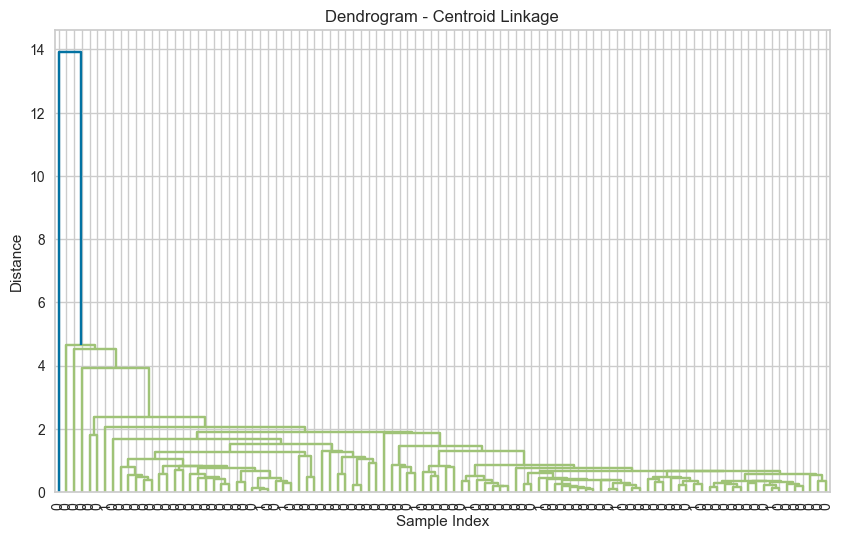

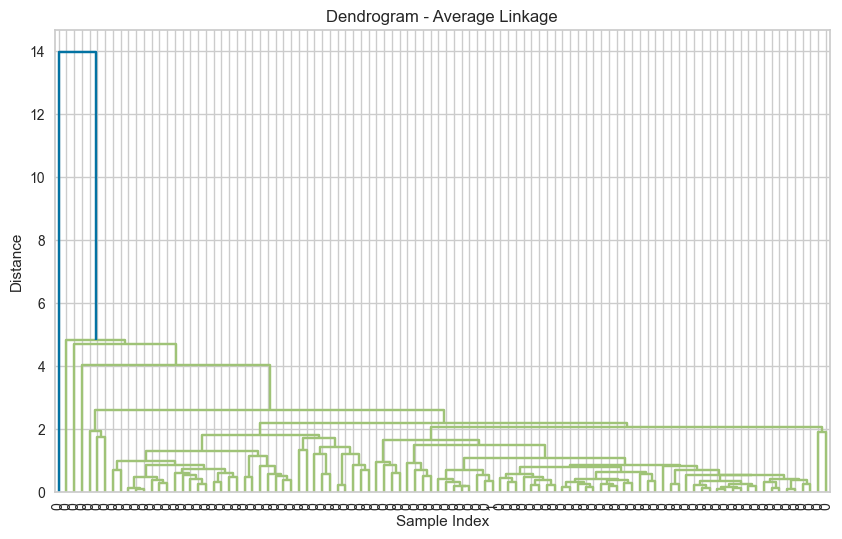

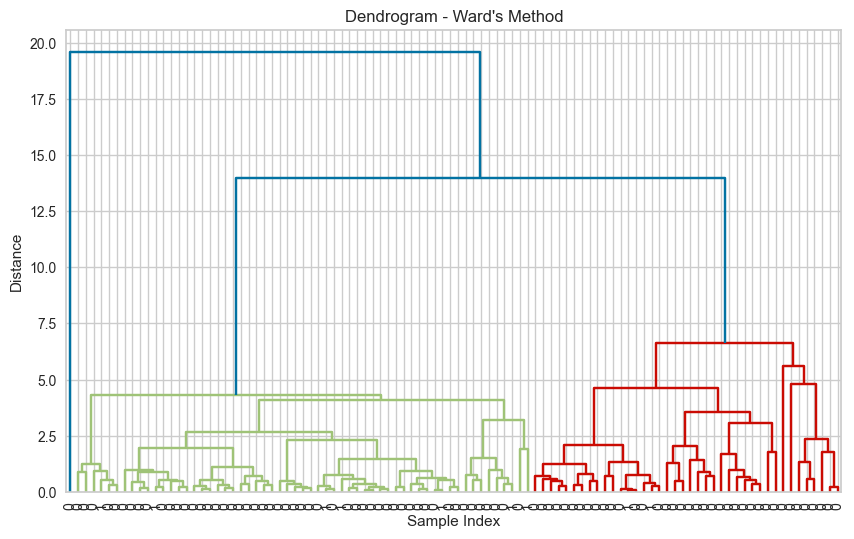

In [143]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Normalize the dataframe
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_transformed)).sample(100)

# Perform agglomerative clustering with centroid linkage
model_centroid = linkage(df_normalized, method='centroid')

# Perform agglomerative clustering with average linkage
model_average = linkage(df_normalized, method='average')

# Perform agglomerative clustering with Ward's method
model_ward = linkage(df_normalized, method='ward')

# Plot the dendrogram for centroid linkage
plt.figure(figsize=(10, 6))
dendrogram(model_centroid, labels=labels_centroid, leaf_font_size=10)
plt.title("Dendrogram - Centroid Linkage")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Plot the dendrogram for average linkage
plt.figure(figsize=(10, 6))
dendrogram(model_average, labels=labels_average, leaf_font_size=10)
plt.title("Dendrogram - Average Linkage")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Plot the dendrogram for Ward's method
plt.figure(figsize=(10, 6))
dendrogram(model_ward, labels=labels_ward, leaf_font_size=10)
plt.title("Dendrogram - Ward's Method")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [149]:
hclust = create_model("hclust", linkage="ward", num_clusters=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:58:21
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3682,3260.9163,1.3507,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [150]:
plot_model(hclust, "cluster")